# Zuber Ride- Sharing Analisis

Kami akan mengeksplorasi data ride-sharing untuk perusahaan ride-sharing baru bernama `Zuber`. Sebelumnya telah di ambil data dari situs web mengenai kondisi cuaca setiap jam, dan menggunakan SQL untuk menanyakan data dari database Zuber.

Kami memiliki kumpulan data yang berisi jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017, bersama dengan kumpulan data yang berisi jumlah rata-rata perjalanan yang berakhir di setiap lingkungan Chicago pada bulan November 2017. Kami akan mengeksplorasi data ini untuk mengidentifikasi jumlah penumpang yang paling banyak turun lingkungan sekitar dan perusahaan taksi dan menarik kesimpulan umum berdasarkan apa yang kami temukan melalui grafik.

Kami juga memiliki kumpulan data yang kami kueri dari database Zuber menggunakan SQL, yang berisi kondisi cuaca setiap jam dan durasi perjalanan. Kami akan menguji secara statistik apakah durasi rata-rata perjalanan dari Loop ke Bandara Nasional O'Hare sama pada hari Sabtu dengan cuaca hujan seperti pada hari Sabtu cerah.

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## EDA

In [2]:
#import datasets

try:
    trips_amount = pd.read_csv('moved_project_sql_result_01.csv')
except:
    trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')

try:
    dropoff = pd.read_csv('moved_project_sql_result_04.csv')
except:
    dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

## Preprocessing

### trips_amount.preprocessing

Melihat data, check tipe data, dan memastikkan nilai tabel nya masuk akal.



In [3]:
trips_amount.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [4]:
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
trips_amount.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
trips_amount.duplicated().sum()

0

Jumlah dari data perjalanan nilai nya adalah bilangan bulat, dan tidak ada nilai duplikat. Jumlah perjalanan berkisar dari 2 perjalanan perperusahaan hingga hampir 20.000 perjalan perperusahaan dan terilhatnya cukup realistis.

### dropoff preprocessing

In [7]:
dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Dari data atas dapat dilihat bahwasannya nilai data dari diatas adalah tipe `float` dan ini memberitahu bahwasannya nilai nya dalam berbentung angka. Selanjutnya akan diubah menjadi bilagan bilangan `int64` supaya datanya lebih mudah digunakan.

In [9]:
dropoff.average_trips = dropoff.average_trips.astype('int')

In [10]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
dropoff.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


In [12]:
dropoff.duplicated().sum()

0

Data `dropoff` telah diubah nilai nya menjadi nilai bilangan bulat dan jumlah rata - rata penurunan nya berkisar dari 1 hingga hampir 11.000, dan tidak ada nilai hilang dan tidak ada nilai duplikat.

## Exploring Data

Mari melihat data 10 lokasi teratas dalam data `dropoff`.

In [13]:
# Mengurutkan tabel berdasarkan rata - rata
top_ten_dropoff = dropoff.sort_values('average_trips', ascending=False).head(10).set_index('dropoff_location_name')
top_ten_dropoff.head(10)

,average_trips
dropoff_location_name,
Loop,10727
River North,9523
Streeterville,6664
West Loop,5163
O'Hare,2546
Lake View,2420
Grant Park,2068
Museum Campus,1510
Gold Coast,1364


Text(0.5, 0, 'Location')

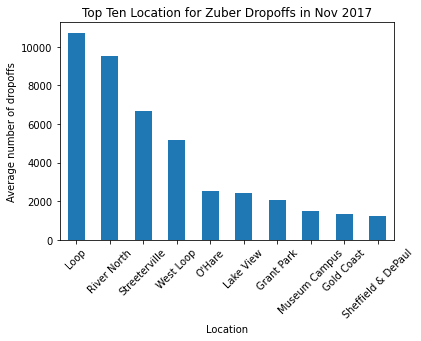

In [14]:
#membuat bar chart

top_ten_dropoff.plot(kind='bar', rot=45, legend=False)
plt.title('Top Ten Location for Zuber Dropoffs in Nov 2017')
plt.ylabel('Average number of dropoffs')
plt.xlabel('Location')

Dari diagram batang diatas dapat terlihat bahwasannya lokasi `Loop` adalah lokasi yang populer sebagai tempat drop off pada bulan November ditahun 2017 lalu diikuti dengan `River North`, `Streeterville` , dan `West Loop` . Lokasi - lokasi tersebut adalah lokasi yang paling populer di Chicago dibandingkan dengan lingkungan lainnya dan relatif sentral. Sehingga cukup masuk akal jika lingkungan ini mengalami penurunan jumlah pengunjung. 

Sekarang melihat diagram batang perusahaan taksi dan jumlah perjalanan yang dilakukan masing-masing perusahaan pada tanggal `15-16 November 2017`. Ada beberapa perusahaan, jadi mari lihat juga 10 perusahaan teratas.

In [15]:
top_ten_companies = trips_amount.sort_values(by='trips_amount', ascending=False).head(10).set_index('company_name')
top_ten_companies

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


Text(0.5, 1.0, 'Tumpangan yang Diberikan oleh Perusahaan Nov 16 - 17 (2017)')

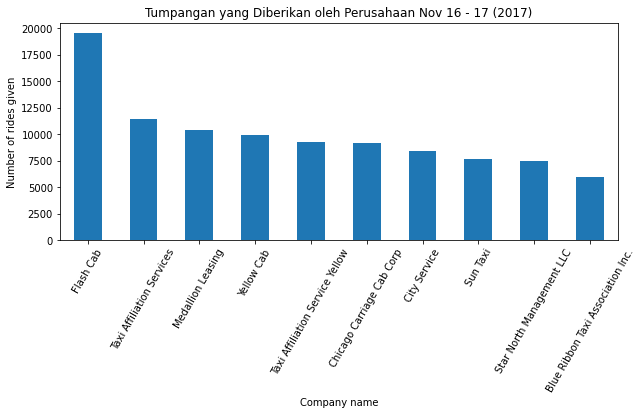

In [16]:
top_ten_companies.plot(kind='bar', rot=60, figsize=(10,4), legend=False)
plt.xlabel('Company name')
plt.ylabel('Number of rides given')
plt.title('Tumpangan yang Diberikan oleh Perusahaan Nov 16 - 17 (2017)')

Pada tnagggal 16 - 17 November 2017 perusahaan `Flash Cab` memberikan jumlah penumpang yang terbanyak sekitar 19588 penumpang, lalu layanan dari `Taxi Affilitaion Services` merupakan layanan penumpang yang terbanyak digunakan setelah `Flash Cab` yaitu 11422 penumpang.

## Statistical Testing

Menguji apakah terdapat perbedaan yang signifikan antara durasi rata - rata perjalanan dari `Loop` menuju `O'Hare` International Airport pada hari Sabtu pada saat keadaan hujan dengan Sabtu pada saat keadaan cerah. Untuk pengujian nya menggunakan sample independet `t-test` 

In [17]:
# Import weather dataset
try:
    weather_records = pd.read_csv('moved_project_sql_result_07.csv')
except:
    weather_records = pd.read_csv('/datasets/project_sql_result_07.csv')

In [18]:
# Check tabel

weather_records.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [19]:
#Mengecheck tipe data dan nilai yang hilang 

weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Mengubah stempel waktu dari objek menjadi waktu yang tepat, lalu tambahkan kolom yang menunjukkan hari dalam seminggu. Semua hari seharusnya hari Sabtu, tapi saya ingin memverifikasi ini.

In [20]:
weather_records.start_ts = pd.to_datetime(weather_records.start_ts, format='%Y-%m-%dT%H:%M:%S')

In [21]:
weather_records['day_of_week'] = weather_records.start_ts.dt.dayofweek

In [22]:
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [23]:
weather_records.day_of_week.unique()

array([5])

Mengambil potongan data untuk perjalanan dengan cuaca bagus dan perjalanan dengan cuaca buruk.

In [24]:
rainy_trips = weather_records.duration_seconds[weather_records.weather_conditions == 'Bad']
clear_trips = weather_records.duration_seconds[weather_records.weather_conditions == 'Good']

Mari melihat arti dan distribusi durasi perjalanan untuk kedua bagian data ini.

In [25]:
rainy_trips.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [26]:
clear_trips.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Sepertinya durasi perjalanan rata-rata pada hari Sabtu pada kondisi hujan lebih lama pada bulan November 2017 dibandingkan pada hari Sabtu pada kondisi cerah. Dan deviasi standarnya serupa, sehingga kita dapat menetapkan variansnya sama ketika kita menjalankan uji-t.

Text(0, 0.5, 'Number of trips')

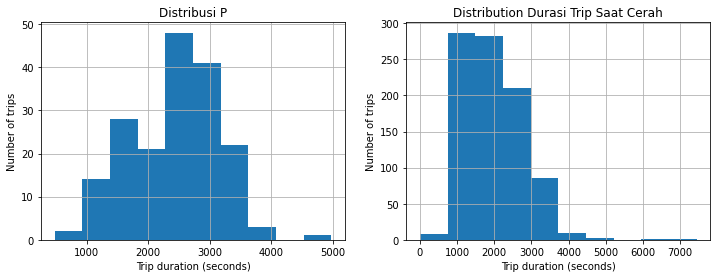

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
rainy_trips.hist()
plt.title('Distribusi P')
plt.xlabel('Trip duration (seconds)')
plt.ylabel('Number of trips')

plt.subplot(1,2,2)
clear_trips.hist()
plt.title('Distribution Durasi Trip Saat Cerah')
plt.xlabel('Trip duration (seconds)')
plt.ylabel('Number of trips')

Kedua sampel tampaknya sebagian besar terdistribusi normal, dan sampelnya jauh lebih besar dari 50. Kami akan menguji hipotesis nol bahwa rata-rata durasi perjalanan pada hari Sabtu pada saat keadaan hujan sama dengan pada hari Sabtu pada saat keadaan cerah /tidak hujan. Hipotesis alternatifnya adalah rata-rata durasi perjalanan berbeda. Kami akan menetapkan alpha kami ke 0,05 sehingga kami dapat yakin dalam menangkap tren, dibandingkan dengan alpha yang lebih rendah yang mungkin terlalu ketat dan menghasilkan lebih banyak negatif.

In [28]:
st.ttest_ind(rainy_trips, clear_trips, equal_var=True)

Ttest_indResult(statistic=6.946177714041499, pvalue=6.517970327099473e-12)

Dapat dilihat nilai p sangat rendah, sehingga menolak hipotesis nol yang menyatakan bahwa rata-rata durasi perjalanan pada hari Sabtu hujan dan Sabtu pada kondisi cerah adalah setara. Perjalanan pastinya memakan waktu lebih lama saat hujan.

## Kesimpulan 

Dari data diatas dapat diambil kesimpulan bahwasannya perusahaan taksi dengan jumlah penumpang terbanyak berada pada tanggal 15 - 16 November 2017. Dan `Flash Cab` memiliki jumlah penumpang terbanyak dengan selisih yang besar, dan perusahaan taksi berikutnya berada jauh di belakang. Dan lingkungan yang paling banyak dikunjungin pada bulan November 2017 yaitu `Loop`,`River North`, `Streetville`, dan `West Loop`. Lalu membandingkan durasi perjalanan rata-rata pada hari Sabtu pada kondisi hujan dengan hari  Sabtu kondisi cerah untuk perjalanan dari `Loop` ke ` O'Hare International Aiport` pada bulan November 2017, dan menemukan perbedaan yang signifikan secara statistik `Sabtu pada saat kondisi hujan cenderung memiliki durasi perjalanan lebih lama dibandingkan hari Sabtu dalam kondisi cerah.`

Sebelum bagian proyek ini, kita mendapatkan data dari situs web dan menulis query SQL untuk mengambil data dari database. Lalu pada bagian ini, yaitu membuat visualisasi dan menggunakan pengujian statistik.